# Disaster or Not - NLP classification of Tweets

Tweets can be used to communicate emergency information about disasters. Organizations who are intereseted in responding to disasters can monitor Twitter streams for information on emergent disasters based on thier text content. In this project, a dataset of tweets that are hand labeled as beign about a disaster or not.

## Data wrangling and EDA

The first step is to download the data from Kaggle. This has been done already into a downloads folder. We'll open the raw download, do some light cleaning and then save in another folder.

In [2]:
import pandas as pd

test = pd.read_csv('../downloads/test.csv')
train = pd.read_csv('../downloads/train.csv')

print("Test size:", test.shape)
print("Training size:", train.shape)
print("Number of keywords:", train.keyword.nunique())

train.head()

Test size: (3263, 4)
Training size: (7613, 5)
Number of keywords: 221


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


5 columns are given, 3 of which have no non-null values. Keyboard and location are missing for all rows. Let's look at the distribution of target (disaster or not) values.

In [3]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


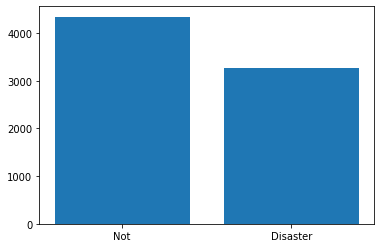

In [3]:
import matplotlib.pyplot as plt

target_count = train.target.value_counts()
plt.bar(['Not','Disaster'],target_count)
plt.show()

## Keywords

In [4]:
train.keyword.unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

Oh, I get it! It looks like these Tweets were selected because their keywords look like disaster-realted terms. Some of the words have a double meaning. "Landslide" for example could mean a natural disaster on a hillside, or a political outcome of an election! "Smoke" is both a noun and a verb. 

Do the test and training set share the same keywords?

In [5]:
difference = set(train.keyword.unique()) - set(test.keyword.unique())
difference

set()

The test and training set share the same keywords. 

Can we guess about the origin of the dataset? Let's look at the top values:

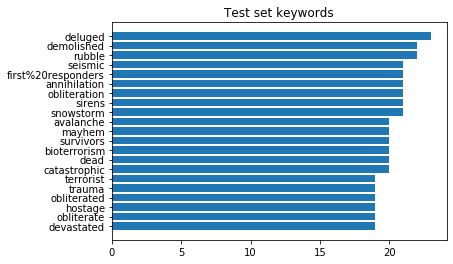

In [6]:
test_keywords = test.keyword.value_counts()
plt.barh(test_keywords.index[20::-1],test_keywords.iloc[20::-1])
plt.title('Test set keywords')
plt.show()

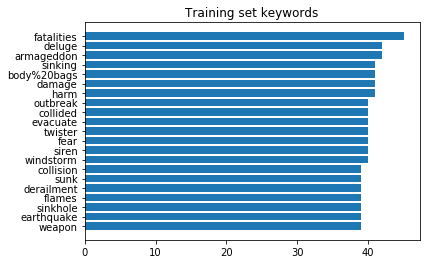

In [7]:
train_keywords = train.keyword.value_counts()
plt.barh(train_keywords.index[20::-1],train_keywords.iloc[20::-1])
plt.title('Training set keywords')
plt.show()

Let's look at the training set keywords as a function of the target

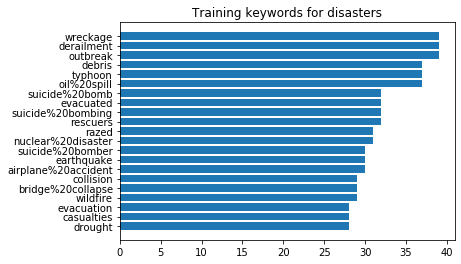

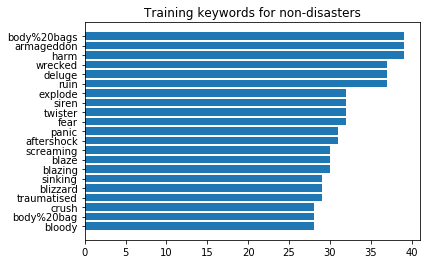

In [8]:
disaster_train_keywords = train[train.target == 1].keyword.value_counts()
not_disaster_train_keywords = train[train.target == 0].keyword.value_counts()


plt.barh(disaster_train_keywords.index[20::-1],disaster_train_keywords[20::-1])
plt.title('Training keywords for disasters')
plt.show()

plt.barh(not_disaster_train_keywords.index[20::-1],disaster_train_keywords[20::-1])
plt.title('Training keywords for non-disasters')
plt.show()

It looks like someone did a keyword search and selected data with keywords that seem related to disasters. From there the Tweets would have been human-read and then classified as being about disasters or not. I wonder how this would work in a filter looking at real time data on these keywords?